In [3]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.5.0


In [29]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [27]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress',
              'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 
              'Ankle Boot']
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle Boot']

In [32]:
type(train_images)

numpy.ndarray

In [18]:
l, r, c = train_images.shape
tl, tr, tc = test_images.shape

train_images = train_images.reshape(l, r, c, 1)
test_images = test_images.reshape(tl, tr, tc, 1)

train_images, test_images = train_images / 255.0 , test_images / 255.0

In [19]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [20]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [21]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 35s 19ms/step - loss: 0.4856 - accuracy: 0.8232
Epoch 2/5
1875/1875 [==============================] - 39s 21ms/step - loss: 0.3162 - accuracy: 0.8860
Epoch 3/5
1875/1875 [==============================] - 41s 22ms/step - loss: 0.2716 - accuracy: 0.8998
Epoch 4/5
1875/1875 [==============================] - 38s 20ms/step - loss: 0.2408 - accuracy: 0.9115
Epoch 5/5
1875/1875 [==============================] - 40s 21ms/step - loss: 0.2178 - accuracy: 0.9194


In [22]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 3s - loss: 0.2695 - accuracy: 0.9014

Test accuracy: 0.9014000296592712


In [23]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [24]:
predictions = probability_model.predict(test_images)

In [25]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

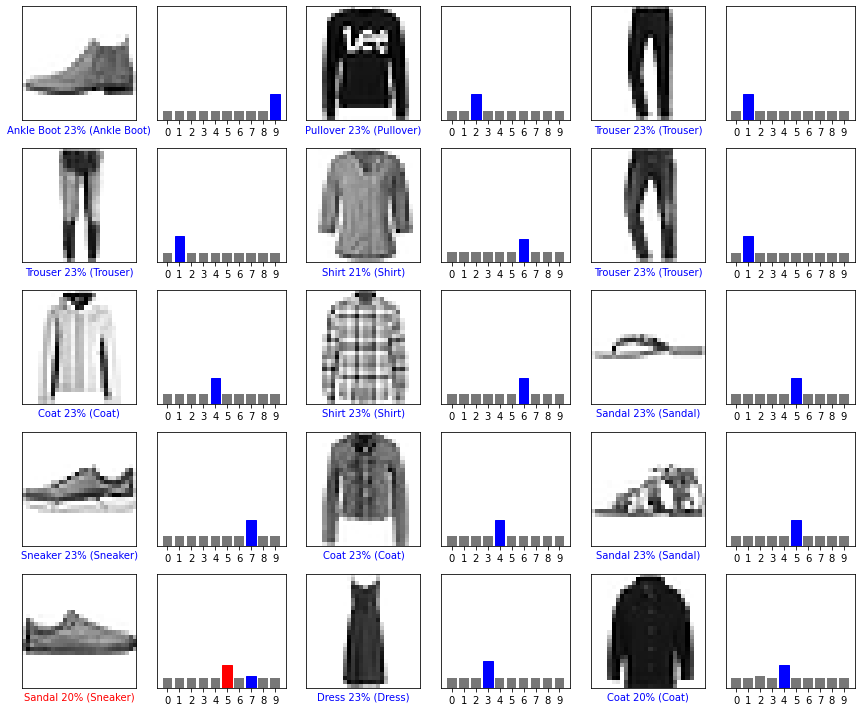

In [28]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()